# Sample portfolio 1

This notebook runs through the library on the files specified as __'sample_portfolio1'__

First we import everything

In [1]:
import pandas as pd 
import numpy as np
from entropy_pooling import views
from entropy_pooling import entropy_minimizer
from entropy_pooling import markoviz_optimizer

Then we get the data

In [2]:
data_raw = pd.read_excel("data.xlsx")
weights = data_raw[["Weight"]]
scenarios = data_raw.drop(columns = ["Weight"]).dropna(axis=1, how='all')

We load the vies

In [3]:
(A,b,C,d) = views.load();

We create the posterior distribution

In [4]:
c = 0.5
p = np.array(weights)
m,n = p.shape

posterior = entropy_minimizer.full_confidence_posterior(p, A,b,C,d)
weighted_posterior = entropy_minimizer.confidence_weighted_posterior(p, posterior, c)



Results
Optimal dual variable values:  [ 0.          0.         -1.00741107  0.27863596  0.00687   ]
Jacobian matrix at optimum [ 5.54049852e-04  2.58868827e-01  3.20395932e-10 -1.59856400e-08
 -2.05725881e-10]


We get the deltas and create the asset space. Additionally, we import the additional constraints for the markoviz optimization

In [5]:
deltas, asset_names = markoviz_optimizer.load_asset_deltas("entropy_pooling/sample_portfolio1_deltas.xlsx")

asset_scenarios = markoviz_optimizer.asset_scenarios(scenarios, deltas)

loaded_constraints = pd.read_excel("entropy_pooling/sample_portfolio1_constrs.xlsx").dropna(axis=1, how='all')
manual_constraints = (loaded_constraints.iloc[:,:-2], loaded_constraints.iloc[:,-2], loaded_constraints.iloc[:,-1])

And finally we do markowitz optimization on the posterior distribution and plot the outcome.

We minimize the volatility at return $\mu_0 = 0.5$ and do not allow for shorting.

c:\Users\Christian Segercrant\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_constraints.py:432: OptimizeWarning: Equality and inequality constraints are specified in the same element of the constraint list. For efficient use with this method, equality and inequality constraints should be specified in separate elements of the constraint list. 


The optimization was succesful: False
The optimization was terminated due to: 
Positive directional derivative for linesearch


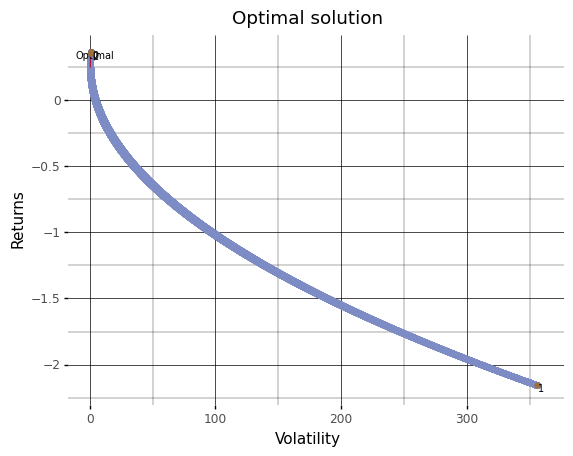

In [12]:
optimal_x = markoviz_optimizer.optimizer(asset_scenarios,
                                         weighted_posterior,
                                         mu_0 = 0.5,
                                         manual_constraints = manual_constraints,
                                         allow_shorting = False,
                                         visualize = True,
                                         verbose = 1).x